In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [23]:
x,y=make_circles( n_samples=1000,factor=0.1,noise=0.35,random_state=42)

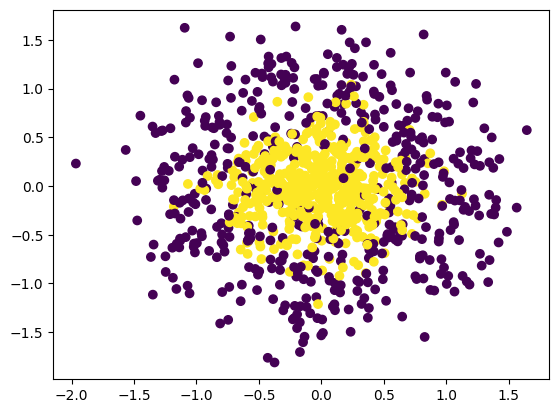

In [24]:
plt.scatter(x[:,0],x[:,1],c=y)

In [26]:
from sklearn.model_selection import cross_val_score

In [30]:
adaboost=AdaBoostClassifier()
np.mean(cross_val_score(adaboost,x,y,scoring="accuracy",cv=10))

C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R

0.8240000000000001

In [39]:
ab=AdaBoostClassifier(n_estimators=500,learning_rate=0.1,algorithm='SAMME.R',)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
ab.fit(x_train,y_train)

C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

In [41]:
y_pred=ab.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred)

0.86

In [45]:
cross_val_score(ab,x,y,scoring="accuracy",cv=10)

C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R

array([0.82, 0.88, 0.83, 0.87, 0.84, 0.85, 0.78, 0.83, 0.89, 0.86])

<!-- Grid search cv -->

# grid search cv

In [65]:
from sklearn.model_selection import GridSearchCV

grid=dict()
grid["n_estimators"] = [10,50,100,500]
grid["learning_rate"] =[0.001,0.01,0.1]
grid["algorithm"] = ["SAMME","SAMME.R"]


In [66]:
grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=1,cv=10,scoring="accuracy")
grid_result = grid_search.fit(x, y)
print("bets score wwe have:",grid_result.best_score_,"The best parameters are:",grid_result.best_estimator_)

C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R

bets score wwe have: 0.849 The best parameters are: AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


In [68]:
print(grid_result.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
